In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('epa-sea-level.csv')

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,-0.196003,-0.396003,0.003997,-0.167225
1,1881,0.223857,0.023857,0.423857,0.366856
2,1882,0.291349,0.091349,0.491349,0.159428
3,1883,0.778310,0.578310,0.978310,0.669158
4,1884,-0.226569,-0.426569,-0.026569,-0.138758


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      10000 non-null  int64  
 1   CSIRO Adjusted Sea Level  10000 non-null  float64
 2   Lower Error Bound         10000 non-null  float64
 3   Upper Error Bound         10000 non-null  float64
 4   NOAA Adjusted Sea Level   10000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


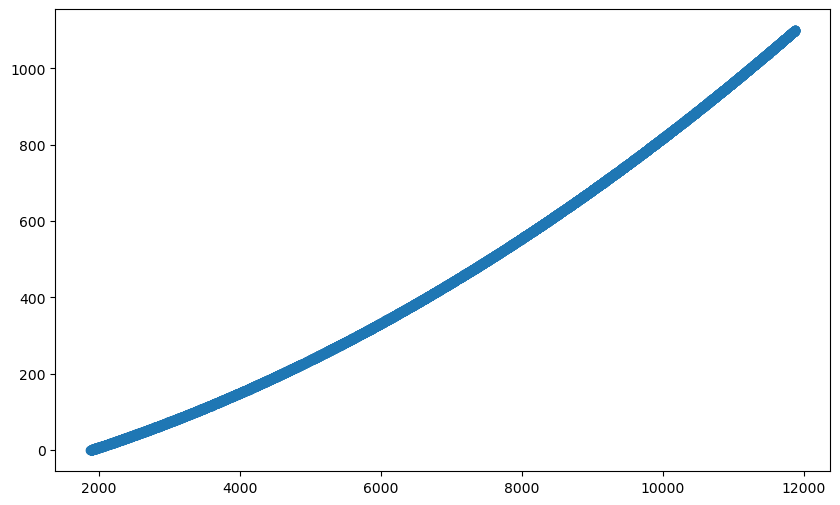

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Original Data')

In [8]:
# Calculate linear regression on the full dataset
res = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

In [11]:
years_extended = pd.Series(range(int(df['Year'].min()), 2051))
sea_levels_predicted = res.slope * years_extended + res.intercept

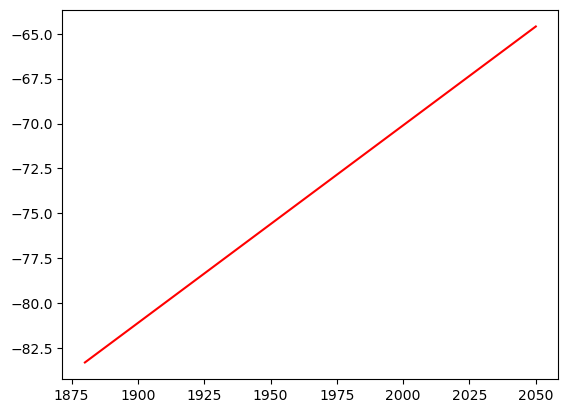

In [12]:
plt.plot(years_extended, sea_levels_predicted, 'r', label='Best Fit Line (1880-2050)')

In [13]:
df_recent = df[df['Year'] >= 2000]
res_recent = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
years_recent_extended = pd.Series(range(2000, 2051))
sea_levels_recent_predicted = res_recent.slope * years_recent_extended + res_recent.intercept

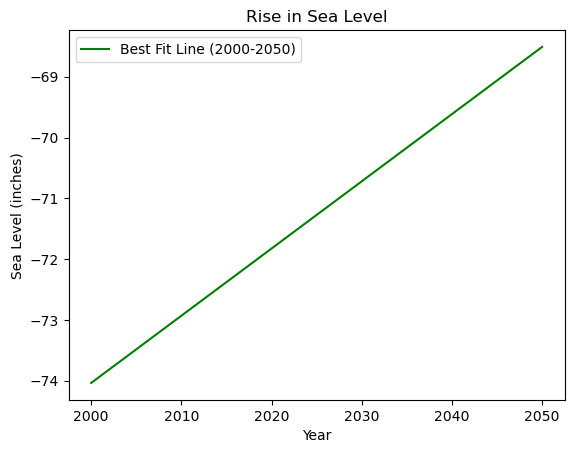

In [18]:
plt.plot(years_recent_extended, sea_levels_recent_predicted, 'green', label='Best Fit Line (2000-2050)')
plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.legend()

In [17]:
plt.savefig('sea_level_plot.png')

<Figure size 640x480 with 0 Axes>